In [54]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f219928b00fb7c297e9e9b3c82e5d455


In [39]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arlit
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | kindu
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | esperance
Processing Record 11 of Set 1 | chatrapur
Processing Record 12 of Set 1 | labytnangi
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | dicabisagan
Processing Record 15 of Set 1 | fort nelson
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | portland
Processing Record 18 of Set 1 | bucsa
Processing Record 19 of Set 1 | novopokrovka
Processing Record 20 of Set 1 | zyryanka
Processing Record 21 of Set 1 | sao filipe
Processing Record 22 of Set 1 | hithadhoo
Processing Record 23 of Set 1 | amderma
Ci

Processing Record 37 of Set 4 | jamestown
Processing Record 38 of Set 4 | kruisfontein
Processing Record 39 of Set 4 | iqaluit
Processing Record 40 of Set 4 | cuiluan
Processing Record 41 of Set 4 | nizhniy ingash
Processing Record 42 of Set 4 | iquitos
Processing Record 43 of Set 4 | bubaque
Processing Record 44 of Set 4 | zhenlai
Processing Record 45 of Set 4 | san patricio
Processing Record 46 of Set 4 | roma
Processing Record 47 of Set 4 | san quintin
Processing Record 48 of Set 4 | ahipara
Processing Record 49 of Set 4 | kuryk
Processing Record 50 of Set 4 | sobolevo
Processing Record 1 of Set 5 | wanning
Processing Record 2 of Set 5 | sinnamary
Processing Record 3 of Set 5 | makakilo city
Processing Record 4 of Set 5 | platon sanchez
Processing Record 5 of Set 5 | lebu
Processing Record 6 of Set 5 | may pen
Processing Record 7 of Set 5 | gbarnga
Processing Record 8 of Set 5 | zhigalovo
Processing Record 9 of Set 5 | souillac
Processing Record 10 of Set 5 | djibo
Processing Record

Processing Record 28 of Set 8 | bandarbeyla
Processing Record 29 of Set 8 | chuy
Processing Record 30 of Set 8 | shelburne
Processing Record 31 of Set 8 | guadix
Processing Record 32 of Set 8 | santa maria
Processing Record 33 of Set 8 | santiago del estero
Processing Record 34 of Set 8 | selaphum
Processing Record 35 of Set 8 | general roca
Processing Record 36 of Set 8 | port hardy
Processing Record 37 of Set 8 | mato verde
Processing Record 38 of Set 8 | plock
Processing Record 39 of Set 8 | valdivia
Processing Record 40 of Set 8 | staraya poltavka
Processing Record 41 of Set 8 | chicama
Processing Record 42 of Set 8 | acarau
Processing Record 43 of Set 8 | nola
Processing Record 44 of Set 8 | banda aceh
Processing Record 45 of Set 8 | sidi ali
Processing Record 46 of Set 8 | padang
Processing Record 47 of Set 8 | iralaya
Processing Record 48 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 49 of Set 8 | fenoarivo atsinanana
Processing Record 50 of Set 8 | idil
Pro

Processing Record 19 of Set 12 | anqiu
Processing Record 20 of Set 12 | kimberley
Processing Record 21 of Set 12 | pandan
Processing Record 22 of Set 12 | yeniseysk
Processing Record 23 of Set 12 | seoul
Processing Record 24 of Set 12 | ulladulla
Processing Record 25 of Set 12 | krasnozerskoye
Processing Record 26 of Set 12 | commerce
Processing Record 27 of Set 12 | bronnoysund
Processing Record 28 of Set 12 | prieska
Processing Record 29 of Set 12 | bilibino
Processing Record 30 of Set 12 | huarmey
Processing Record 31 of Set 12 | coos bay
Processing Record 32 of Set 12 | poronaysk
Processing Record 33 of Set 12 | pasni
Processing Record 34 of Set 12 | berlevag
Processing Record 35 of Set 12 | timiryazevskoye
Processing Record 36 of Set 12 | tabuk
Processing Record 37 of Set 12 | blanquefort
Processing Record 38 of Set 12 | tevaitoa
Processing Record 39 of Set 12 | cururupu
Processing Record 40 of Set 12 | bartica
Processing Record 41 of Set 12 | tromso
Processing Record 42 of Set 12

In [40]:
len(city_data)

573

In [41]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arlit,18.7369,7.3853,65.86,26,0,6.15,NE,2021-01-15 03:07:44
1,Puerto Ayora,-0.7393,-90.3518,75.00,94,93,7.00,EC,2021-01-15 03:09:47
2,Ushuaia,-54.8000,-68.3000,46.40,71,75,11.50,AR,2021-01-15 03:11:20
3,Talnakh,69.4865,88.3972,-40.31,77,19,2.82,RU,2021-01-15 03:09:57
4,Bluff,-46.6000,168.3333,73.00,63,7,8.99,NZ,2021-01-15 03:11:31
5,Kindu,-2.9500,25.9500,67.77,96,100,1.39,CD,2021-01-15 03:11:31
6,Rikitea,-23.1203,-134.9692,78.22,71,62,9.04,PF,2021-01-15 03:11:31
7,Fortuna,40.5982,-124.1573,54.00,100,90,9.22,US,2021-01-15 03:11:32
8,Albany,42.6001,-73.9662,35.01,74,100,1.32,US,2021-01-15 03:06:34
9,Esperance,-33.8667,121.9000,64.40,63,90,12.66,AU,2021-01-15 03:09:49


In [44]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arlit,NE,2021-01-15 03:07:44,18.7369,7.3853,65.86,26,0,6.15
1,Puerto Ayora,EC,2021-01-15 03:09:47,-0.7393,-90.3518,75.00,94,93,7.00
2,Ushuaia,AR,2021-01-15 03:11:20,-54.8000,-68.3000,46.40,71,75,11.50
3,Talnakh,RU,2021-01-15 03:09:57,69.4865,88.3972,-40.31,77,19,2.82
4,Bluff,NZ,2021-01-15 03:11:31,-46.6000,168.3333,73.00,63,7,8.99
...,...,...,...,...,...,...,...,...,...
568,Mabaruma,GY,2021-01-15 03:12:31,8.2000,-59.7833,71.62,95,77,2.73
569,Busko-Zdroj,PL,2021-01-15 03:12:31,50.4708,20.7188,26.01,1,100,9.17
570,Eureka,US,2021-01-15 03:12:31,40.8021,-124.1637,52.00,91,34,2.37
571,Sangar,RU,2021-01-15 03:12:31,63.9242,127.4739,-43.74,77,18,5.46


In [46]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [47]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

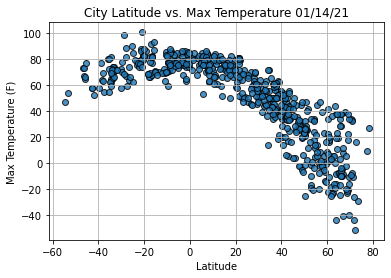

In [48]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

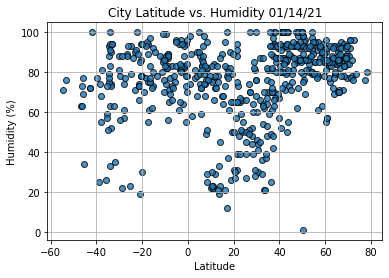

In [49]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

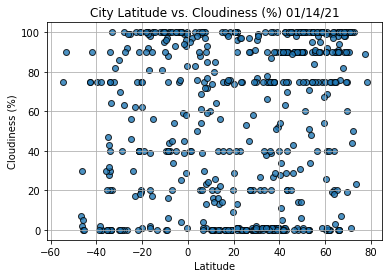

In [50]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

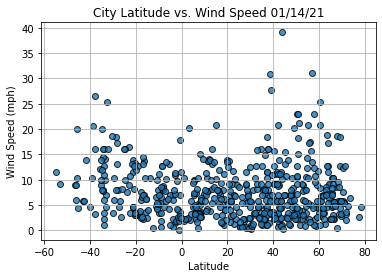

In [51]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [69]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [60]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arlit,NE,2021-01-15 03:07:44,18.7369,7.3853,65.86,26,0,6.15
3,Talnakh,RU,2021-01-15 03:09:57,69.4865,88.3972,-40.31,77,19,2.82
7,Fortuna,US,2021-01-15 03:11:32,40.5982,-124.1573,54.00,100,90,9.22
8,Albany,US,2021-01-15 03:06:34,42.6001,-73.9662,35.01,74,100,1.32
10,Chatrapur,IN,2021-01-15 03:11:32,19.3500,84.9833,72.72,79,0,5.01


In [61]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

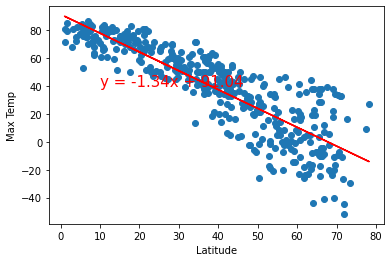

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

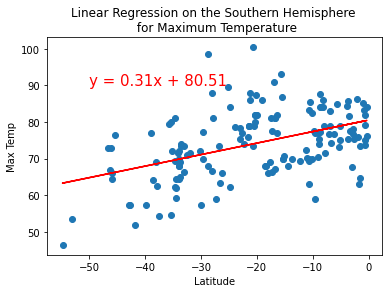

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

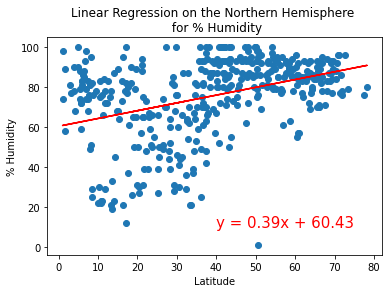

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

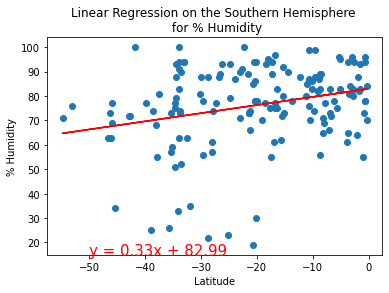

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

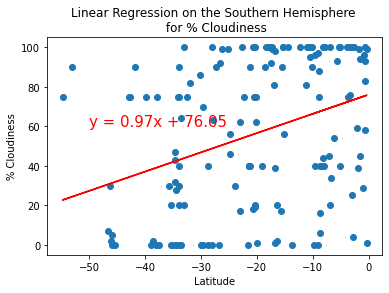

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

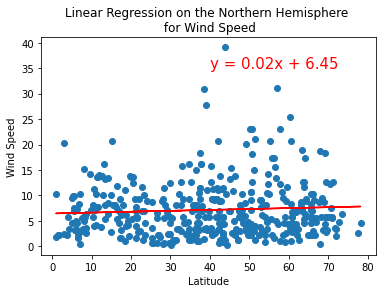

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

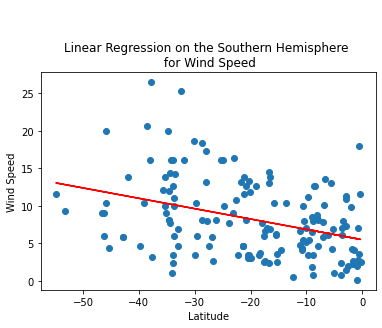

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
df.to